In [2]:
import requests as req

In [ ]:
# request : 
# 서버에게 데이터를 요청해서 응답받기위한 라이브러리
# 요청하고, 응답받으면 역할이 끝
# 브라우저의 역할을 대신
# 페이지 정보를 알아오는 함수 get("url")

In [3]:
# req에게 네이버 메인 페이지 정보점 알아오라고 명령
req.get("http://www.naver.com")

<Response [200]>

In [ ]:
# <Response [200]> : 데이터 통신에 성공했습니다
# 400 에러 : 클라이언트(요청) 오류
# 500 에러 : 서버(응답) 오류

## Melon 사이트 페이지 정보를 요청

In [4]:
# <Response [406]>
# 멜론서버에서 브라우저가 아닌 코드라고 인식했기 때문에 접근 불가
req.get("https://www.melon.com/")

<Response [406]>

In [10]:
# 브라우저인척 속이는 작업
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}

In [12]:
res = req.get("https://www.melon.com/", headers = h)

In [13]:
# 응답객체(response)안에서 html 코드만 추출
res.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론"/>\

## 네이버에페이지에서 블로그,뉴스 글자수집

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
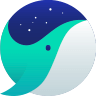
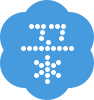

In [17]:
#1. 네이버 메인페이지 정보를 요청
res = req.get("http://www.naver.com")
res.text

In [19]:
#3. 컴퓨터가 이해할수 있는 html언어로 변형
# beautifulsoup 라이브러리
from bs4 import BeautifulSoup as bs

In [22]:
soup = bs(res.text,"lxml")

In [32]:
#2. 뉴스,블로그 등과 같은 글자만 수집
#2-1 html 태그정보를 알려주기!
# 필요한 요소를 검색해서 수집하는 명령 .select("선택자")★
txt = soup.select("a.nav")
# 반환받은 리스트 데이터중에 첫번째 데이터만 가지고올때 select_one("선택자")★
soup.select_one("a.nav")

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [39]:
soup.select_one("a.nav")

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [44]:
txt[0].text

'메일'

In [46]:
for i in txt :
    print(i.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
책
웹툰
